# surface hydrology - first assignment

# introduction
for our first assignment we will discuss and compare two meteorologic stations using data from NOAA's. 
we will look for stations with over 60 years of data and we will try to find two places that we expect to have some different charactrestics.
the two station that I chose are Sheffield, Eangland and Milan, Italy.

## background - Sheffield
<img src="https://static.onecms.io/wp-content/uploads/sites/9/2017/12/sheffield-england-ft-blog1217.jpg" width="400" height="250">

Sheffield is a town located in the center of the main island in England in the district of Yorkshire. Around 600,000 people live in Sheffield and its size is 367.94 sm. The reason I chose Sheffield as one of my stations is because I always thought England was a very rainy country and I imagine it as a very cloudy place to be. Because I am a person who loves sun and not getting wet I wanted to check my thoughts about England.

## background - Milan

<img src="https://juliasalbum.com/wp-content/uploads/2019/04/Milan-Italy-2.jpg" width="400" height="250">

Milan is a city located in the north side of Italy in lombardia district and it is the second biggest city in Italy after Rome with 1.3 million people while in the metropolitan live more then 7.5 miliion people.
The reason I chose Milan as my second station is because I've worked in Italy near Milan for two winters and I wondered hows the summer there look like percipitation wise.

### graphs color and code names
All the codes will be with the first letter of the city for monthly data (S or M) and two letters for daily data (SS or MM). Sheffield graph will always be on the left while Milan on the right.
To make it easy for us to see the results on the graphs and since we are all football lovers I chose to use Sheffield and Milan football teams for our color in the graphs.
the picture on the left is Sheffield wednesday fc badge in blue and on the right in picture we can see legendary Zlatan inbrahimovich wearing FC Milan shirt color red.

<table><tr>
<td> 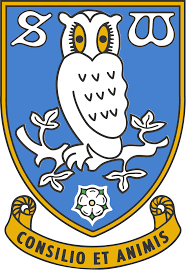 </td>
<td> <img src=https://acefootball.com/wp-content/uploads/2020/12/GettyImages-1287092005.jpg" alt="Drawing" style="width: 330px;"/> </td>
</tr></table>

# 1) inter-annual variability and mean annual precipitation
For our first topic we will discuss the differences between years. We will look at the changes using all the data we have over the years and compare it with the mean annual. we would try to find how big are the variation between each year and to see if we can evaluate the differences between the cities.

## figure #1 - annual precipitation
first we want to examine the interannual data of each city. for that we will use monthly data from the website (NOAA's) and pack it in years. also we will calculate the annual mean.
in the next graph we can see the annual precipitation in mm for each year recorded and a line (orange in both graphs) to indicate the annual mean precipitation.

In [1]:
# import all relevant packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from calendar import month_abbr
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import urllib.request
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from functools import reduce
import re
import urllib.request

In [2]:
# a function that download monthly data
def download_data(station_name, station_code):
    url_monthly = 'https://www.ncei.noaa.gov/data/gsom/access/'
    urllib.request.urlretrieve(url_monthly + station_code + '.csv',
                               station_name + '_monthly.csv')

In [3]:
#1 downloading relevant data using function above
#2 reading the data


download_data('S', 'UKE00105904')
# FROM NOW ON MONTHLY DATA OF SHEFFIELD WILL BE CALLED S = SHEFFIELD
df_S = pd.read_csv('S_monthly.csv', sep=",")
# make 'DATE' the dataframe index
df_S['DATE'] = pd.to_datetime(df_S['DATE'])
df_S = df_S.set_index('DATE')


download_data('M', 'ITE00100554')
# FROM NOW ON MONTHLY DATA OF MILAN WILL BE CALLED M = MILAN
df_M = pd.read_csv('M_monthly.csv', sep=",")
# make 'DATE' the dataframe index
df_M['DATE'] = pd.to_datetime(df_M['DATE'])
df_M = df_M.set_index('DATE')



In [4]:
# choose only the precipitation column for sheffield
df_S_month = df_S['PRCP']

# calculate monthly mean
monthly_mean = np.array([])  # empty array
month_numbers = np.arange(1,13)
month_names = [month_abbr[i] for i in month_numbers]

for m in month_numbers:      # cycle over months (1, 2, 3, etc)
    this_month_all_indices = (df_S_month.index.month == m)       # indices in df_month belonging to month m
    this_month_mean = df_S_month[this_month_all_indices].mean()  # this is the monthly mean
    monthly_mean = np.append(monthly_mean, this_month_mean)    # append

df_SHEFFIELD = pd.DataFrame({'monthly rainfall (mm)':monthly_mean,
                             'month names':month_names,
                             'month number':month_numbers
                            })

# choose only the precipitation column for milan
df_M_month = df_M['PRCP']

# calculate monthly mean
monthly_mean = np.array([])  # empty array
month_numbers = np.arange(1,13)
month_names = [month_abbr[i] for i in month_numbers]

for m in month_numbers:      # cycle over months (1, 2, 3, etc)
    this_month_all_indices = (df_M_month.index.month == m)       # indices in df_month belonging to month m
    this_month_mean = df_M_month[this_month_all_indices].mean()  # this is the monthly mean
    monthly_mean = np.append(monthly_mean, this_month_mean)    # append

df_MILAN = pd.DataFrame({'monthly rainfall (mm)':monthly_mean,
                             'month names':month_names,
                             'month number':month_numbers
                            })



In [5]:
# annual frequency, anchored 31 December - Shffield

df_year_all_S = df_S['PRCP'].resample('A').sum().to_frame()
# rename 'PRCP' column to 'rain (mm)'
df_year_all_S.columns = ['rain (mm)']
# exclude both 1st and last rows
df_year_S = df_year_all_S.iloc[1:-1]

# annual frequency, anchored 31 December - Milan

df_year_all_M = df_M['PRCP'].resample('A').sum().to_frame()

# rename 'PRCP' column to 'rain (mm)'
df_year_all_M.columns = ['rain (mm)']
# exclude chosen rows
df_year_M = df_year_all_M.iloc[95:-1]

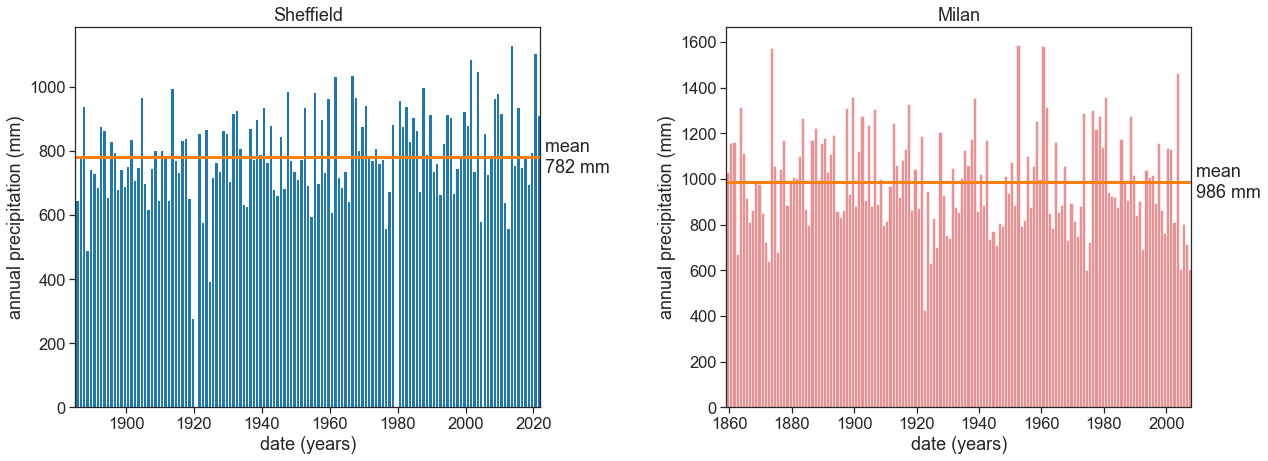

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
plt.subplots_adjust(wspace=0.4)

# plot YEARLY precipitation - Sheffield
ax1.bar(df_year_S.index, df_year_S['rain (mm)'],
       width=365, align='edge', color="tab:blue")
# plot mean
rain_mean = df_year_S['rain (mm)'].mean()
ax1.plot(df_year_S*0 + rain_mean, linewidth=3, color="tab:orange")
# adjust labels, ticks, title, etc
ax1.set_title("Sheffield")
ax1.set_xlabel("date (years)")
ax1.set_ylabel("annual precipitation (mm)")
ax1.set_xlim([df_year_S.index[0], df_year_S.index[-1]])
# write mean on the right
ax1.text(df_year_S.index[-1], rain_mean, " mean\n {:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center");

# plot YEARLY precipitation - Milan
ax2.bar(df_year_M.index, df_year_M['rain (mm)'],
       width=365, align='edge', color="tab:red", alpha = 0.5)

# plot mean
rain_mean = df_year_M['rain (mm)'].mean()
ax2.plot(df_year_M*0 + rain_mean, linewidth=3, color="tab:orange")
# adjust labels, ticks, title, etc
ax2.set_title("Milan")
ax2.set_xlabel("date (years)")
ax2.set_ylabel("annual precipitation (mm)")
ax2.set_xlim([df_year_M.index[0], df_year_M.index[-1]])
# write mean on the right
ax2.text(df_year_M.index[-1], rain_mean, " mean\n {:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center");




from the Sheffield graph we can see data from 1884 to 2018 (except for a few years in between). we can roughly say that the annual percipitation run between 600 - 1000 mm per year and also the annual of 778 mm per year indicates that.
For Milan the data we have run between the years 1858 to 2007 and the annual percipitation run roughly betweeen 600 - 1300 per year for most and the annual mean is 986 mm per year.

We can now start seeing the differences between the two. first we can now see that Milan is more rainy then Sheffield with around more then 200 mm per year even though I imagined Sheffield as rainier city. another thing that we will examine more percisly in the next graphs is the big changes in annual percipitation in Milan between years while in Sheffield the changes smaller and more steady. we can refer that to the fact that in Milan there is more rain and for that the variation can be bigger.
Another optional reason for that in Milan there is unsteady weather might be the fact that its located south to the alphs which makes a big seperation of weather between the north side and the south and can affect differently each year.

## figure #2 - Annual precipitation averages for half the data time
In our next figure we wanted to examine the differences that occurred during the annual precipitation. This is a very basic and simple way to test it, but still gives us an idea about the big climate changes we have over a long period of time. We divided our data for each city in two and checked the average against each other and also for the overall annual average.
Since we know there are climate changes in our world, we would expect to find some differences especially for data we have two hundred years ago. the industrial revolution that started not much before 1850 and have grown unbeliviebley fast since then must have made some changes in weather or even natural changes throught time.

(975.0, 1000.0)

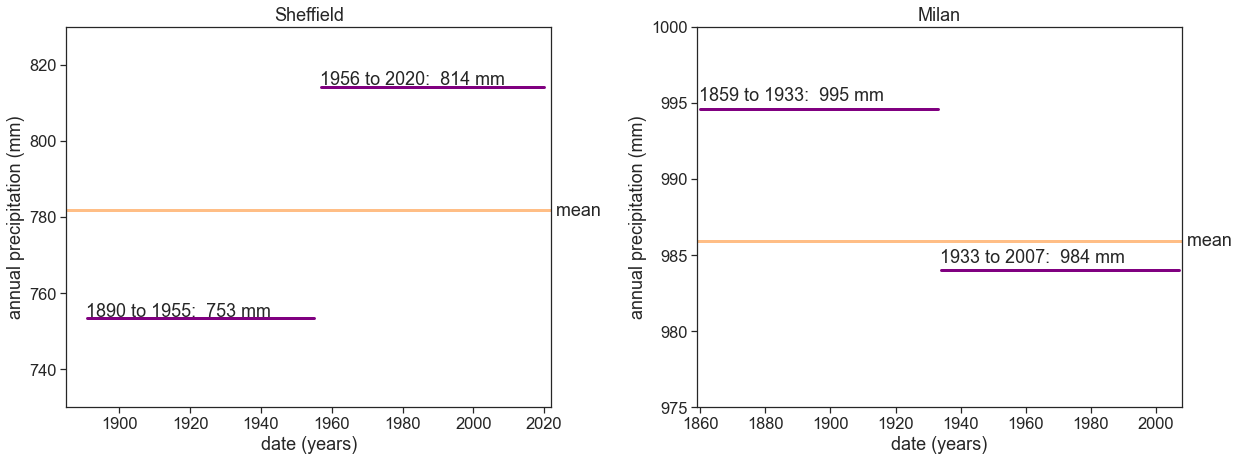

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
plt.subplots_adjust(wspace=0.3)

# windows of length 65 years (dividing all years in two) - Sheffield
windows = [[1890,1955], [1956,2020]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year_S['rain (mm)'][start_date:end_date].mean()
    ax1.plot(df_year_S[start_date:end_date]*0+window_mean, color="purple", linewidth=3)
    ax1.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm")
# plot mean
rain_mean = df_year_S['rain (mm)'].mean()
ax1.plot(df_year_S*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax1.text(df_year_S.index[-1], rain_mean, " mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center")
# adjust labels, ticks, title, limits, etc
ax1.set_title("Sheffield")
ax1.set_xlabel("date (years)")
ax1.set_ylabel("annual precipitation (mm)")
ax1.set_xlim([df_year_S.index[0], df_year_S.index[-1]])
ax1.set_ylim([730, 830])


# windows of length 74 years - (dividing all years in two) - Milan
windows = [[1859,1933], [1933,2007]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year_M['rain (mm)'][start_date:end_date].mean()
    ax2.plot(df_year_M[start_date:end_date]*0+window_mean, color="purple", linewidth=3)
    ax2.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm")
# plot mean
rain_mean = df_year_M['rain (mm)'].mean()
ax2.plot(df_year_M*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax2.text(df_year_M.index[-1], rain_mean, " mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center")
# adjust labels, ticks, title, limits, etc
ax2.set_title("Milan")
ax2.set_xlabel("date (years)")
ax2.set_ylabel("annual precipitation (mm)")
ax2.set_xlim([df_year_M.index[0], df_year_M.index[-1]])
ax2.set_xlim([df_year_M.index[0], df_year_M.index[-1]])
ax2.set_ylim([975, 1000])

Using our two graphs we can now check if our thoughts were right. generally saying talking about annual precipitation I can say that again my thoughts were wrong. a variation of 60 (Sheffield) and 10 (Milan) mm per year in averege for a data spread for around 50-70 years is not that big.
A reason for the mistake might be that were looking of the changes annualy but maybe like we see here in Israel the last years the changes are more intra-annual and less inter-annual and we find bigger rainfalls of short periods but while checking at the end of the year we get around the same amount in total.
obviously those are big conclutions for a tiny check like i made but still an option.

## figure- #3 number of years with annual precipitation, mean, std and CV
In our next and last figure regarding to interannual precipitation we will check the number of years we have for each 100 mm bin. we will also see the mean as a comparasent and we will check the standart deviation. 
Last we can see showing in the figures is the CV - coefficient of variation.

Text(5, 5.5, 'CV = 0.22')

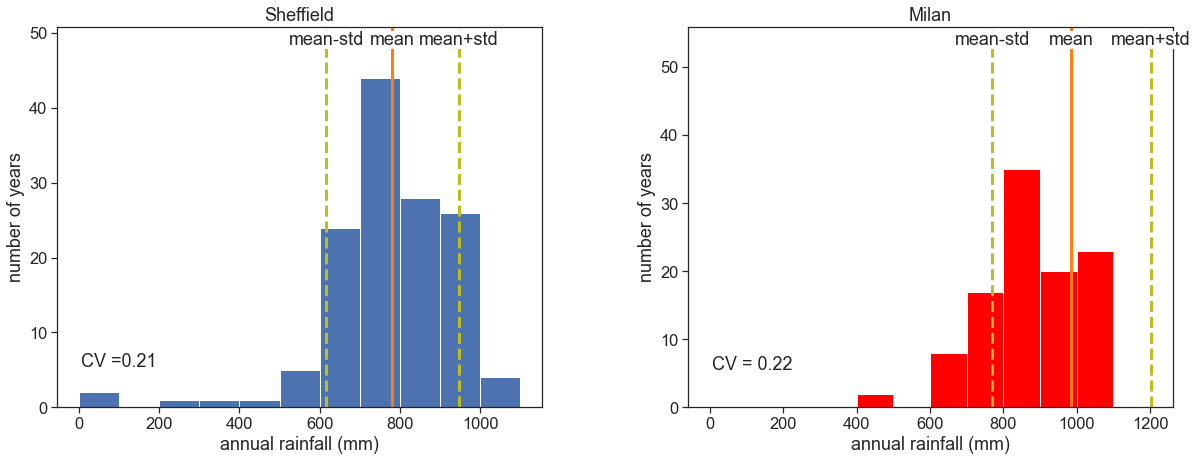

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
plt.subplots_adjust(wspace=0.3)

# Sheffield
# calculate mean and standard deviation
rain_mean = df_year_S['rain (mm)'].mean()
rain_std = df_year_S['rain (mm)'].std()
# plot histogram
b = np.arange(0, 1101, 100)  # bins from 0 to 55, width = 5
ax1.hist(df_year_S, bins=b)
# plot vertical lines with mean, std, etc
ylim = np.array(ax1.get_ylim())
ylim[1] = ylim[1]*1.1
ax1.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax1.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax1.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax1.set_ylim(ylim)
# write mean, std, etc
ax1.text(rain_mean, ylim[1]*0.99, "mean",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
ax1.text(rain_mean+rain_std, ylim[1]*0.99, "mean+std",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
ax1.text(rain_mean-rain_std, ylim[1]*0.99, "mean-std",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
# adjust labels, ticks, title, limits, etc
ax1.set_title("Sheffield")
ax1.set_xlabel("annual rainfall (mm)")
ax1.set_ylabel("number of years")
# saving data of cv using relevant variables 
CV_SHEFFIELD = rain_std / rain_mean
CV_SHEFFIELD= (f"{CV_SHEFFIELD:.2f}")
ax1.text(5, 5.5 , f"CV ="+ CV_SHEFFIELD )

#Milan
# calculate mean and standard deviation
rain_mean = df_year_M['rain (mm)'].mean()
rain_std = df_year_M['rain (mm)'].std()
# plot histogram
b = np.arange(0, 1101, 100)  # bins from 0 to 55, width = 5
ax2.hist(df_year_M, bins=b, color='red')
# plot vertical lines with mean, std, etc
ylim = np.array(ax1.get_ylim())
ylim[1] = ylim[1]*1.1
ax2.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax2.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax2.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax2.set_ylim(ylim)
# write mean, std, etc
ax2.text(rain_mean, ylim[1]*0.99, "mean",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
ax2.text(rain_mean+rain_std, ylim[1]*0.99, "mean+std",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
ax2.text(rain_mean-rain_std, ylim[1]*0.99, "mean-std",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
# adjust labels, ticks, title, limits, etc
ax2.set_title("Milan")
ax2.set_xlabel("annual rainfall (mm)")
ax2.set_ylabel("number of years")
# saving data of cv using relevant variables 
CV_MILAN = rain_std / rain_mean
CV_MILAN= (f" {CV_MILAN:.2f}")
ax2.text(5, 5.5 , f"CV ="+ CV_MILAN )


we can now see that the spread of both cities are quite similar but in Sheffield it seems a bit more centered then in Milan (we can ignore the first bin of Sheffield since its data with no record). if we examine the standard variation we find that for Sheffield the number is 164 mm and 216 for Milan (calculated using the code). we would think now that the std of Milan means that the variation is bigger but we need to consider also the annual mean and that is exactly what the CV does dividing the standard deviation with the annual mean. we can see that for both are city the CV is very close (0.21 for Sheffield and 0.22 for Milan) which means that they have similar variation between the years. the meaning of the CV of both is that the rainfall will vary +-22% from their long term mean.

# 2) intra-annual variability and seasonality
After discussing about the differenced between years we now want to move on and check the changes inside a year between the months. we will find this answers using the monthly mean and showing it on a figure. also we will check the seasonality index and will see if we can find the hydrological year for each city.

## figure- #4 monthly mean
In the next figure we will see the monthly mean for each month over the year for all the years of data we have for each city. this would gives us a first idea of how big are the intra-annual differences for each city and will give us first impression for the seasonality which we will precisely check later on. Finally we will choose the hydrological year for each city.


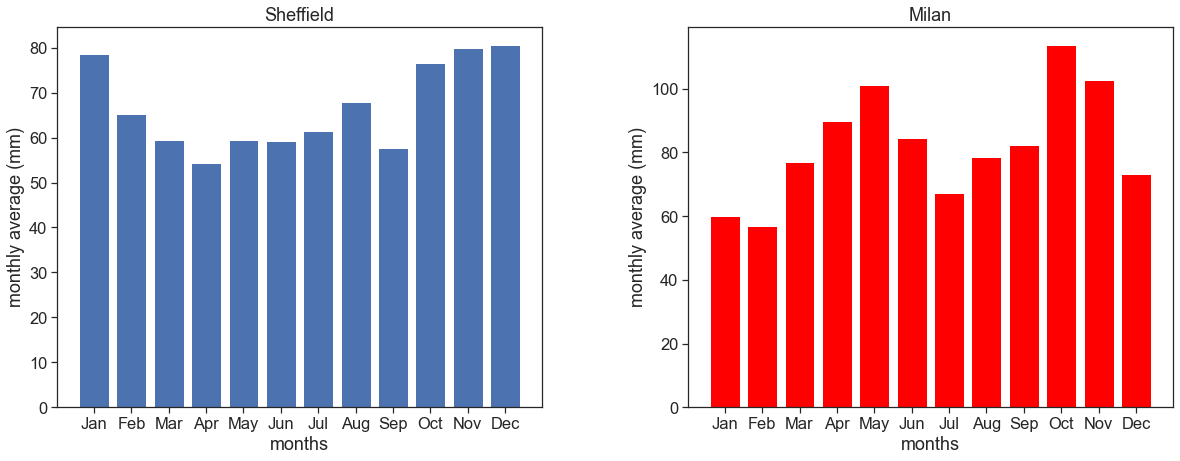

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
plt.subplots_adjust(wspace=0.3)

#Sheffield
ax1.bar(df_SHEFFIELD['month number'], df_SHEFFIELD['monthly rainfall (mm)'])
ax1.set(xlabel="months",
       ylabel="monthly average (mm)",
       title="Sheffield",
       xticks=df_SHEFFIELD['month number'],
       xticklabels=df_SHEFFIELD['month names']);
#Milan
ax2.bar(df_MILAN['month number'], df_MILAN['monthly rainfall (mm)'], color='red')
ax2.set(xlabel="months",
       ylabel="monthly average (mm)",
       title="Milan",
       xticks=df_MILAN['month number'],
       xticklabels=df_MILAN['month names']);

For Sheffield we can see immediately that it is not that seasional. the annual mean that we found in the last topic is spread quiet evenly through the year. In Milan the seasonality is a bit higher but still we find almost 60 mm of rain in each month of the year. if we compare that to israel for exemple we know that here we have more then 4 months without rain at all and most of the rain is within the four months of winter.
it is very hard to say what is the hyrological year for Sheffield but we will probably choose something around april since its the lowest month and before and after we see higher monthly mean
for Milan it is a bit easyer to choose and the begening of the hydrological year will be february.

## figure-#5 monthly mean on a radar chart and seasionality index
We will show again the monthly average but now on a radar chart which will highlight the seasonality and will also refer to an exect number of seasonality index using walsh index.

$R=$ mean annual precipitation  
$m_i$ precipitation mean for month $i$  

$$ SI = \displaystyle \frac{1}{R} \sum_{n=1}^{n=12} \left| m_i - \frac{R}{12} \right| $$

| SI | Precipitation Regime |
| --- | --- |
| <0.19 | Precipitation spread throughout the year |
| 0.20-0.39	 | Precipitation spread throughout the year, but with a definite wetter season |
| 0.40-0.59	 | Rather seasonal with a short dry season |
| 0.60-0.79	 | Seasonal |
| 0.80-0.99	 | Marked seasonal with a long dry season |
| 1.00-1.19		 | Most precipitation in < 3 months |

In [10]:
# walsh index function - seasonality index
def walsh_index(df):
    m = df["monthly rainfall (mm)"]
    R = df["monthly rainfall (mm)"].sum()
    SI = np.sum(np.abs(m - R/12)) / R
    return SI
SI_SHFFIELD = str(round(walsh_index(df_SHEFFIELD) , 2))
SI_MILAN = str(round(walsh_index(df_MILAN), 2))

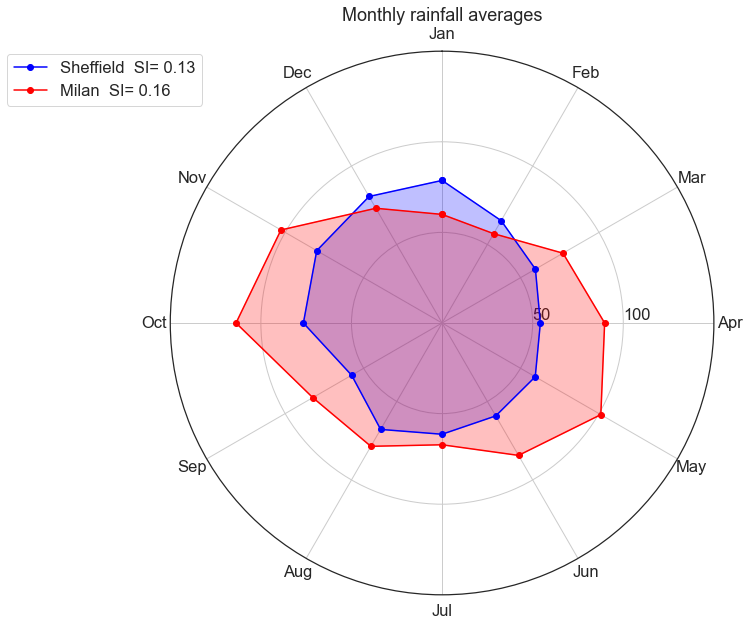

In [11]:
# radar chart
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, polar=True)     # make polar plot
ax.set_theta_zero_location("N")           # January on top ("N"orth)
ax.set_theta_direction(-1)                # clockwise direction
ax.set_rlabel_position(90)                # radial labels on the right
ax.set_rticks([50,100])                   # two radial ticks is enough
ax.set_rlim(0,150)                        # limits of r axis
angles=np.linspace(0, 2*np.pi, 12, endpoint=False)       # divide circle into 12 slices
angles=np.append(angles, angles[0])                      # close loop, otherwise lines will be open
ax.set_thetagrids(angles[:-1] * 180/np.pi, month_names)  # relabel angles with month names

# plot Sheffield data
stats_S = np.array(df_SHEFFIELD['monthly rainfall (mm)'])        # get Sheffield data
stats_S = np.append(stats_S, stats_S[0])            # close loop
ax.plot(angles, stats_S, "o-", color='blue', label="Sheffield  SI= "+ SI_SHFFIELD)  # plot line
ax.fill(angles, stats_S, alpha=0.25, color='blue')            # fill

# plot Milan
stats_M = np.array(df_MILAN['monthly rainfall (mm)'])        # get Milan data
stats_M = np.append(stats_M, stats_M[0])           # close loop
ax.plot(angles, stats_M, "o-", color='red', label="Milan  SI= "+ SI_MILAN )  # plot line
ax.fill(angles, stats_M, alpha=0.25, color='red')              # fill

ax.set_title("Monthly rainfall averages")
ax.legend(loc=(-0.3,0.9))  # legend at x=-0.2 so it doesn't overlap with graph


We can see in the chart again as we already saw that Milan is rainier than Sheffield and in most months there is more precipitation in Milan.  we can also see that Sheffield is very even spread in monthly mm throught the year and the circle in the chart emphasize that. For both cities using Walsh index we find SI of 0.13 for Sheffield and 0.16 for Milan and looking at the table above we see they both fall in the same box of Precipitation spread throughout the year as we already said and discuss.

# 3) extreme rainfall events and return times
After discussing yearly and monthly data we will now move on to our last topic which will focus in daily data. we will try to find some extreme rainfalls whitin the data we have for each city, make a comparasent between the cities and also try to find return times and give estimation for extreme events with bigger amount of rainfall then we have in our data or outside of our year range.

In [12]:
def download_data(station_name, station_code):
    url_daily = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    urllib.request.urlretrieve(url_daily + station_code + '.csv',
                               station_name + '_daily.csv')

In [13]:
download_data('SS', 'UKE00105904')
# # FROM NOW ON DAILY DATA OF SHEFFIELD WILL BE CALLED SS = SHEFFIELD
dfSS = pd.read_csv('SS_daily.csv', sep=",")
# make 'DATE' the dataframe index
dfSS['DATE'] = pd.to_datetime(dfSS['DATE'])
dfSS = dfSS.set_index('DATE')
#daily precipitation data is in tenths of mm, divide by 10 to get it in mm.
dfSS['PRCP'] = dfSS['PRCP'] / 10

download_data('MM', 'ITE00100554')
# # FROM NOW ON DAILY DATA OF MILAN WILL BE CALLED MM = MILAN
dfMM = pd.read_csv('MM_daily.csv', sep=",")
# make 'DATE' the dataframe index
dfMM['DATE'] = pd.to_datetime(dfMM['DATE'])
dfMM = dfMM.set_index('DATE')
#daily precipitation data is in tenths of mm, divide by 10 to get it in mm.
dfMM['PRCP'] = dfMM['PRCP'] / 10

## figure #6 - daily rainfalls in the data year range
Using the next figure we will try to see if there any extreme rainfalls that pop out from the figure. we expect to find some extreme events since we have big range of data with more then 100 years in each city. we will also look if its rare to have extreme events in general. we exepect like we have seen so far in the last two subjects that Sheffield have steadier graphs while in Milan the variation is bigger.

Text(0.5, 1.0, 'Milan')

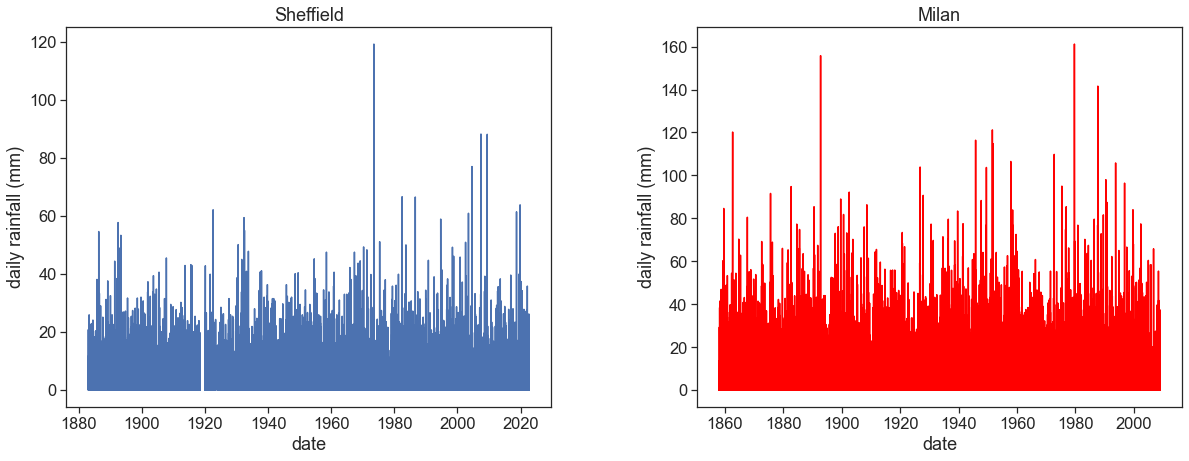

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
plt.subplots_adjust(wspace=0.3)

ax1.plot(dfSS['PRCP'],)
ax1.set_xlabel("date")
ax1.set_ylabel("daily rainfall (mm)")
ax1.set_title("Sheffield")


ax2.plot(dfMM['PRCP'], color = 'red')
ax2.set_xlabel("date")
ax2.set_ylabel("daily rainfall (mm)")
ax2.set_title("Milan")


As we assume the differences in daily weather in Milan are much bigger and we can see every few years an extreme event with 2-3 times higher precipitation than the normal. that also happen in Sheffield but the frequency is not as big. for both we can see a couple of unbelievable days with 120 mm for one day in Sheffield and another 2 days with 160 mm(!) of rain for only one day in Milan. I wonder how the city look like after that kind of extreme rain events.

In [15]:
#excluding unnecessary dates according graph above
last_date_S = '2020-08-01'
first_date_S = '1883-08-01'
dfSSS = dfSS[((dfSS.index < last_date_S) & (dfSS.index > first_date_S))]

last_date_M = '2008-08-01'
first_date_M = '1857-08-01'
dfMMM = dfMM[((dfMM.index < last_date_M) & (dfMM.index > first_date_M))]

In [16]:
#finding max daily percipitation of each year
max_annual_S = (dfSSS['PRCP'].resample('A')
                        .max()
                        .to_frame())
max_annual_M = (dfMMM['PRCP'].resample('A')
                        .max()
                        .to_frame())


## figure- #7 
in the next 4 figures we will show and discuss the chances of getting some rainfall events using probability density function which will tell us about the probability of a certain rainfall events (bins of 10 mm) and cumulative density function which will tell us the probability of getting a rainfall under a certain number. generally speaking using the data we collected we will be able to predict the chances of getting some kind of rainfall whitin a year

Text(0.5, 1.0, 'Milan')

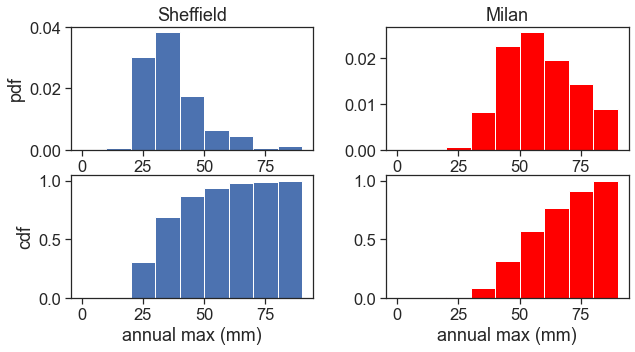

In [17]:
#creating four figures of pdf and cdf (one for each city)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.3)


S=max_annual_S['PRCP'].values
ax1.hist(S, bins=np.arange(0,100,10), density=True)
ax3.hist(S, bins=np.arange(0,100,10), cumulative=1, density=True)
ax1.set(ylabel="pdf")
ax3.set(xlabel="annual max (mm)",
        ylabel="cdf",);

M=max_annual_M['PRCP'].values
ax2.hist(M, bins=np.arange(0,100,10), density=True , color='red')
ax4.hist(M, bins=np.arange(0,100,10), cumulative=1, density=True, color='red')
ax4.set(xlabel="annual max (mm)",);

ax1.set_title("Sheffield")
ax2.set_title("Milan")

Looking at the pdf graphs we can multiply the height and the width of each bin to receive the probability of having some kind of daily rainfall within a year. for exemple talking about Sheffield will check the second and highest bin and will see its height is almost 0.04 and the width is 10 mm and by multipling it we will recieve the result of almost 40% that the highest rainfall of a certain year will be between 30 to 40 mm. looking at Milan we can see that the highest bar is around 0.025 and in general all the bars are spreaded which will make us harder to predict a certain highest rainfall for a year.

talking about the second graph as we mentoined above its talking about cumulative density function which means we can check in this case the probability of getting a rainfall under a certain number. for exemple in Milan the chances of getting a rainfall under 80 mm for a year will be very high of almost 90% and since it is a very big rainfall for a day we are not surprise that in a given year the rainiest day will be lower.

In [18]:
# resample daily data into yearly data (maximum yearly value)
max_annual_S = dfSS['PRCP'].resample('A').max().to_frame()
# sort yearly max from lowest to highest
max_annual_S = max_annual_S.sort_values(by=['PRCP'], ascending=True)
max_annual_S['rank'] = np.arange(0, len(max_annual_S + 1))

nS = len(max_annual_S['rank'])
mS = max_annual_S['rank']
PmS = mS / (nS+1)
TrS = 1 / (1 - PmS)

max_annual_M = dfMM['PRCP'].resample('A').max().to_frame()
# sort yearly max from lowest to highest
max_annual_M = max_annual_M.sort_values(by=['PRCP'], ascending=True)
max_annual_M['rank'] = np.arange(0, len(max_annual_M))

nM = len(max_annual_M['rank'])
mM = max_annual_M['rank']
PmM = mM / (nM+1)
TrM = 1 / (1 - PmM)


## figure- #8 
In the next figure we will see again the chances of receiving an annual maximum rainfall. both x (exceedance probability) and y are in logarithmic scales.
another thing we added to this graph was finding the linear part of it and fitting a line to it. with that we can predict even bigger rainfalls and for a bigger period of times then we have in our data. we will see an example in our next box.

Text(0.5, 1.0, 'Milan')

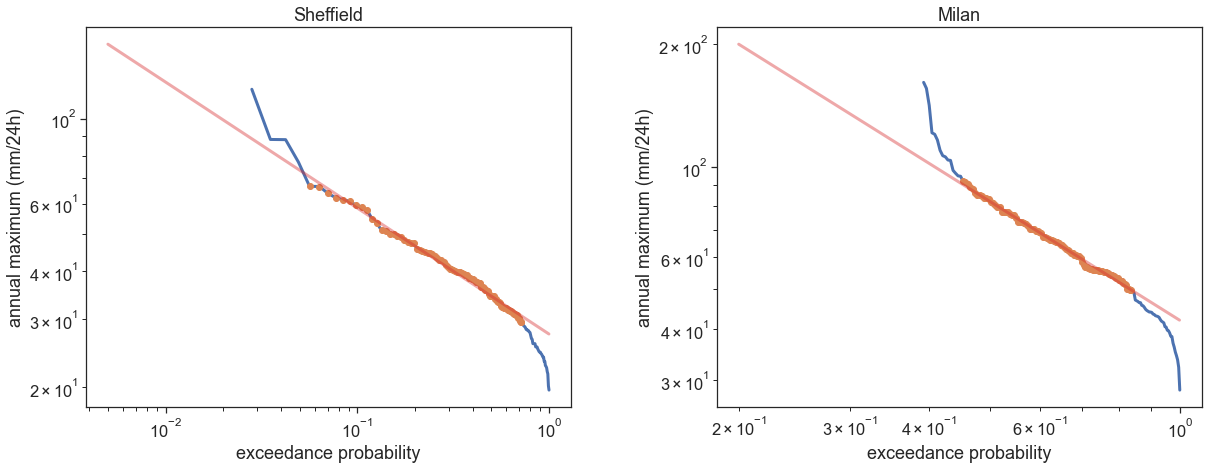

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
plt.subplots_adjust(wspace=0.3)

def equation(p):
    return np.exp(slope*np.log(p) + intercept)

depthS = max_annual_S['PRCP'].values
exc_probS = (1-PmS).values

ax1.plot(exc_probS, depthS, lw=3, label="Weibull plotting position")
ax1.set(ylabel="annual maximum (mm/24h)",
       xlabel="exceedance probability")
ax1.set_xscale("log")
ax1.set_yscale("log")

excludeS = 40
depth_tofitS = depthS[excludeS:-6]
exc_prob_tofitS = exc_probS[excludeS:-6]
ax1.plot(exc_prob_tofitS, depth_tofitS, 'o')

exc_prob_tofit_logS = np.log(exc_prob_tofitS)
depth_tofit_logS = np.log(depth_tofitS)
slope, intercept = np.polyfit(exc_prob_tofit_logS, depth_tofit_logS, 1)

probS = [0.005,1-1e-3]
ax1.plot(probS, equation(probS), lw=3, color="tab:red", alpha=0.4)
ax1.set_title("Sheffield")

depthM = max_annual_M['PRCP'].values
exc_probM = (1-PmM).values

ax2.plot(exc_probM, depthM, lw=3, label="Weibull plotting position")
ax2.set(ylabel="annual maximum (mm/24h)",
       xlabel="exceedance probability")
ax2.set_xscale("log")
ax2.set_yscale("log")

excludeM = 40
depth_tofitM = depthM[excludeM:-110]
exc_prob_tofitM = exc_probM[excludeM:-110]
ax2.plot(exc_prob_tofitM, depth_tofitM, 'o')

exc_prob_tofit_logM = np.log(exc_prob_tofitM)
depth_tofit_logM = np.log(depth_tofitM)
# exc_prob_tofit_logM.dropna(inplace=True)
slope, intercept = np.polyfit(exc_prob_tofit_logM, depth_tofit_logM, 1)

probM = [0.2,1-1e-3]
ax2.plot(probM, equation(probM), lw=3, color="tab:red", alpha=0.4)
ax2.set_title("Milan")


As we can see we chose the linear part for both graphs and fitted the purple line. the line is longer then the data we have and that mean for example that we can find annual maximum rainfall higher then we have in our data and we intentionally made the line in the way that it will be higher then the maximum we already have (the blue line).
so to show that we can take Milan graph and look at a 200 mm maximum rainfall and see that that the probability to have that kind of rainfall is 0.001 and 1/0.001 will give us the return period of 1000 years. in our data we saw 160 mm highest event and it was so rare it happend only twice in more then 100 years so 40 mm higher then that should be so exremley rare or in our case around 1000 years.

# conclusions
Through this all assignment we focused on precipitation looking on yearly monthly and daily data of two station one in Sheffield, England and another in Milan, Italy. we assumed Sheffield will have more spread graphs and the variation of precipitation will be quite low and indeed we found that. the monthly data showed that the seasonality index of Sheffield is very low (0.13).  for Milan we found a bit surprising results since it is also have very low seasonality index (0.16) just a bit higher then Shffield. 

Another thing we saw is that the annual mean in Milan is higher in more then 200 mm. speeking on the variation between years we also found big similarity with coefficient of variation of 0.21-0.22 for both cities which indicates that yearly precipation will vary around 21-22% from the annual mean of each city. 

In our last subject we discussed on extreme rainfalls and we saw some remarkables results for both Sheffield and Milan with 120 mm and 160 mm rainfalls respectively in one day only. 
we saw the probability of receiving some kind of maximum daily rainfalls with pdf and cdf and also we use linear fit to be able to predict even bigger rainfalls in larger range of years.